In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import importlib

import data_processing_helper
importlib.reload(data_processing_helper)
from data_processing_helper import clean_index_names
from data_processing_helper import metaphlan2_taxa_table
from data_processing_helper import sort_top_n

In [2]:
# read from txt file
taxa_metaphlan2 = "metaphlan2_out/merged_relab.txt"
taxa_df = pd.read_csv(taxa_metaphlan2, delimiter = "\t",index_col=0)
# delete the first row, make data type float
taxa_df = taxa_df.drop(["#SampleID"]).astype(float)
taxa_df.head()

,KM-101,KM-10,KM-110,KM-111,KM-112,KM-113,KM-115,KM-116,KM-123,KM-124,...,KM-81,KM-82,KM-86,KM-8,KM-94,KM-95,KM-96,KM-98,KM-99,KM-9
ID,,,,,,,,,,,,,,,,,,,,,
k__Archaea,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0


In [123]:
taxa_df.index.name

'ID'

In [125]:
taxa_df.groupby(taxa_df.index.name).sum()

,KM-101,KM-10,KM-110,KM-111,KM-112,KM-113,KM-115,KM-116,KM-123,KM-124,...,KM-81,KM-82,KM-86,KM-8,KM-94,KM-95,KM-96,KM-98,KM-99,KM-9
ID,,,,,,,,,,,,,,,,,,,,,
k__Archaea,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.76346,0.00000,0.00000,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0
k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Adenoviridae,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.76346,0.00000,0.00000,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0
k__Viruses|p__Viruses_noname|c__Viruses_noname|o__Viruses_noname|f__Adenoviridae|g__Mastadenovirus,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.76346,0.00000,0.00000,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0


In [3]:
# get the lowest level names
taxa_df = clean_index_names(taxa_df, "|")
taxa_df.head()

,KM-101,KM-10,KM-110,KM-111,KM-112,KM-113,KM-115,KM-116,KM-123,KM-124,...,KM-81,KM-82,KM-86,KM-8,KM-94,KM-95,KM-96,KM-98,KM-99,KM-9
ID,,,,,,,,,,,,,,,,,,,,,
c__Actinobacteria,1.38638,1.13738,0.67429,0.06389,0.59391,0.02090,0.56717,2.01778,0.27618,0.47038,...,2.39883,0.00000,0.15901,0.07555,0.00000,0.23199,1.90137,0.20267,1.30527,0.0
c__Alphaproteobacteria,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,2.21551,0.00000,0.90020,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
c__Bacilli,8.15189,0.52506,0.00000,33.14336,0.00000,0.08839,1.42162,7.37301,1.15070,6.76274,...,3.66662,1.90669,0.24053,0.00000,5.31732,1.17211,0.00000,0.00000,0.00000,0.0
c__Bacteroidia,0.30097,0.14913,0.00000,1.01963,2.30385,0.06624,0.00000,0.00000,0.00000,2.34133,...,0.00000,0.00000,0.00000,0.00000,0.13710,0.00000,4.35824,0.00000,0.00000,0.0
c__Betaproteobacteria,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0


In [4]:
# get dataframe for a desired taxa level
level = 'kingdom'
level_df = metaphlan2_taxa_table(taxa_df,level)
level_df.head()

,KM-101,KM-10,KM-110,KM-111,KM-112,KM-113,KM-115,KM-116,KM-123,KM-124,...,KM-81,KM-82,KM-86,KM-8,KM-94,KM-95,KM-96,KM-98,KM-99,KM-9
Archaea,4.47423,0.33098,13.74968,6.93589,1.66649,0.97626,88.5089,6.87671,18.47409,1.4909,...,8.09443,14.76555,0.20856,0.0,0.9915,4.46617,0.0,0.0,0.0,0.0
Bacteria,95.52577,99.66902,86.25032,93.06411,98.33351,99.02374,11.4911,93.12329,81.52591,98.5091,...,91.14211,85.23445,99.79144,100.0,99.0085,95.53383,100.0,100.0,100.0,100.0
Viruses,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,...,0.76346,0.00000,0.00000,0.0,0.0000,0.00000,0.0,0.0,0.0,0.0


#### Stacked bar plot

In [5]:
# top n taxa
n = 10
# from level_df, get top n taxa table and sum "Others"
topn_df = sort_top_n(level_df,n)

# define number of colors for the bar plot
NUM_COLORS = n+1
# define colormap
cm = pylab.get_cmap('tab20')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

Text(0, 0.5, 'Relative abundance (%)')

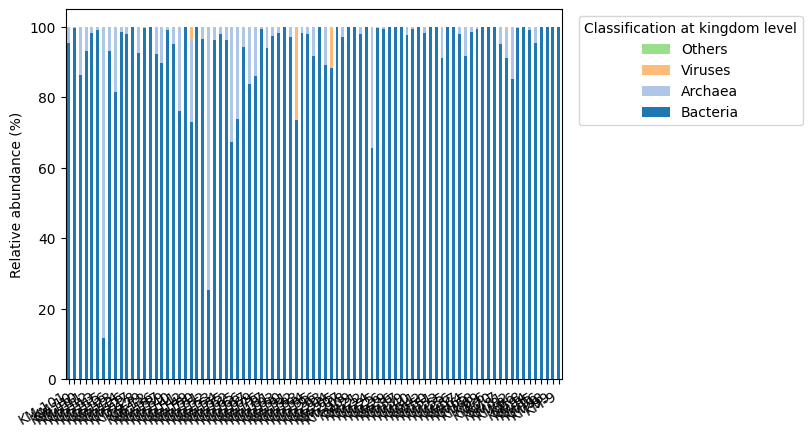

In [6]:
# make stacked bar plot
ax = topn_df.transpose().plot.bar(stacked = True, color = colors)
plt.xticks(rotation=30, horizontalalignment="right")
# reverse legend labels, set legend outside the plot.
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),
          title = f'Classification at {level} level',
          bbox_to_anchor=(1.02, 1.0))
plt.ylabel("Relative abundance (%)")

# save the plot
#plt.savefig('figures/metaphlan2_phy_rel_abun.pdf',bbox_inches='tight')